# **FINDING OUTLIERS**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### LOAD THE DATASET

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_url)

pd.set_option("display.max_columns", None)

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### PLOT THE DISTRIBUTION OUTLIERS

In [4]:
# Check missing values and unique values
print(f"Number of missing values: {len(df)}")
print(f"Number of missing values: {df['Industry'].isna().sum()}")
df['Industry'].unique()

Number of missing values: 65437
Number of missing values: 36579


array([nan, 'Healthcare', 'Software Development',
       'Banking/Financial Services', 'Other:',
       'Media & Advertising Services', 'Insurance',
       'Internet, Telecomm or Information Services', 'Higher Education',
       'Energy', 'Fintech', 'Retail and Consumer Services',
       'Manufacturing', 'Government',
       'Computer Systems Design and Services',
       'Transportation, or Supply Chain'], dtype=object)

The number of missing values are high (more than 50% of total rows), and to fill all those missing values, it's not a good idea if i fill them with mode. I'll fill missing values with `placeholder` *'Unknown'* to avoid bias, and easy to filter out if later needed.

In [5]:
# Fill NaN with place holder 'Unknown'
df['Industry'] = df['Industry'].fillna('Unknown')

# Verify
print(f"Number of missing values after imputing: {df['Industry'].isna().sum()}")

Number of missing values after imputing: 0


In [6]:
industry = df.loc[df['Industry'] != 'Unknown', 'Industry'].value_counts()
industry

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

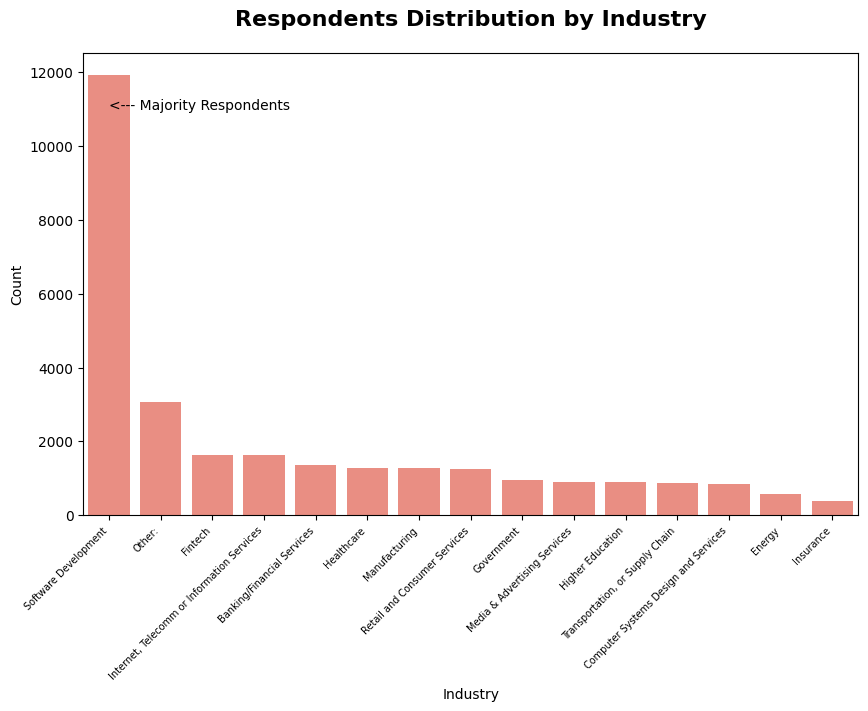

In [17]:
# ---VISUALIZE with BAR CHART---
plt.figure(figsize=(10,6))

sns.barplot(industry, color="salmon")
plt.title("Respondents Distribution by Industry", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.ylabel('Count')
plt.annotate("<--- Majority Respondents",['Software Development', 11000])
plt.show()

Majority of respondents are from `Software Development`.

#### IDENTIFY HIGH COMPENSATION OUTLIERS

In [8]:
# Let's check basic statistic summary
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [37]:
# Define required variables
std = df['ConvertedCompYearly'].std()
mean = df['ConvertedCompYearly'].mean()
median = df['ConvertedCompYearly'].median()

# Basic Statistics
print("--- Basic Statistics (ConvertedCompYearly) ---")
print(f"Standard Deviation: {std:,.2f}")
print(f"Mean: {mean:,.2f}")
print(f"Median: {median:,.2f}")

threshold = mean + (std * 3)
print("\n--- Outlier Threshold ---")
print(f"Any salary above ${threshold:,.2f} is considered an outlier.")

high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

count = len(high_comp_outliers)
pct = (count / len(df)) * 100

print("\n--- Results ---")
print(f"Identified {count} respondents with extremely high compensation.")
print(f"This represents {pct:.2f}% of the total dataset.")

# Top 5 extreme earners
print("\n---------------")
print("Top 5 Extreme Earners:")
high_comp_outliers[['ConvertedCompYearly', 'Country', 'DevType']].sort_values('ConvertedCompYearly', ascending=False).head()

--- Basic Statistics (ConvertedCompYearly) ---
Standard Deviation: 186,756.97
Mean: 86,155.29
Median: 65,000.00

--- Outlier Threshold ---
Any salary above $646,426.21 is considered an outlier.

--- Results ---
Identified 89 respondents with extremely high compensation.
This represents 0.14% of the total dataset.

---------------
Top 5 Extreme Earners:


,ConvertedCompYearly,Country,DevType
15837,16256603.0,Ethiopia,Project manager
12723,13818022.0,South Africa,"Senior Executive (C-Suite, VP, etc.)"
28379,9000000.0,Taiwan,Hardware Engineer
17593,6340564.0,Brazil,"Developer, back-end"
17672,4936778.0,Ukraine,"Developer, mobile"


#### DETECT OUTLIERS IN COMPENSATION

In [39]:
# Create seperate dataframe and drop missing values
comp_df = df.dropna(subset=['ConvertedCompYearly']).copy()

print(f"Number of missing values after imputing: {comp_df['ConvertedCompYearly'].isna().sum()}")

Number of missing values after imputing: 0


Q1 (25%): $32,712.00
Q3 (75%): $107,971.50
IQR:      $75,259.50
------------------------------
Lower Bound: $-80,177.25 or $0
Upper Bound: $220,860.75
------------------------------
Number of Outliers: 978
------------------------------
Size of new cleaned compensation dataframe: 22457

--- VISUALIZATION ---


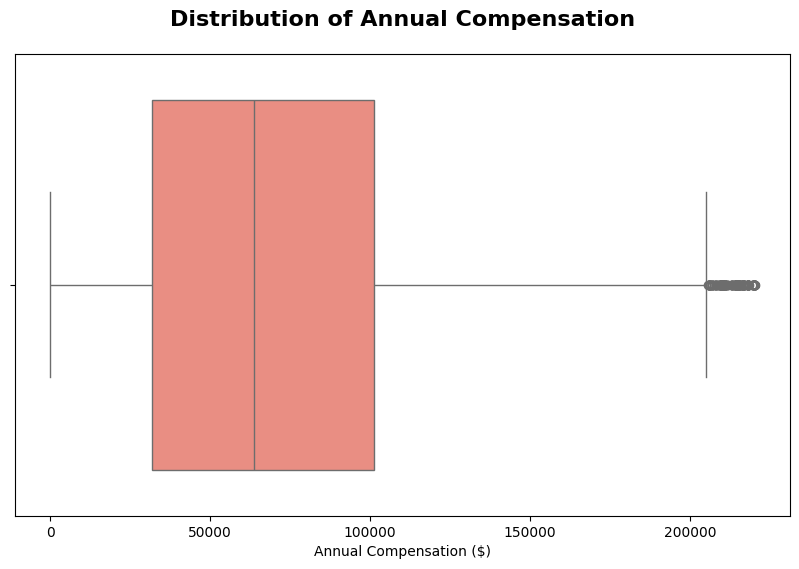

In [68]:
# ---IDENTIFY OUTLIERS USING IQR---
# Define Q1, Q2, IQR
Q1 = comp_df['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate the Bounds (The "Fences")
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# 3. Print the results
print(f"Q1 (25%): ${Q1:,.2f}")
print(f"Q3 (75%): ${Q3:,.2f}")
print(f"IQR:      ${IQR:,.2f}")
print("-" * 30)
print(f"Lower Bound: ${lower_bound:,.2f} or $0")
print(f"Upper Bound: ${upper_bound:,.2f}")


# Outliers count
outliers_count = comp_df[(comp_df['ConvertedCompYearly'] < lower_bound) | 
                         (comp_df['ConvertedCompYearly'] > upper_bound)]

print("-" * 30)
print(f"Number of Outliers: {len(outliers_count['ConvertedCompYearly'])}")

# Filter dataframe using defined IQR
clean_comp = comp_df[(comp_df['ConvertedCompYearly'] >= lower_bound) &
                     (comp_df['ConvertedCompYearly'] <= upper_bound)].copy()

print("-" * 30)
print(f"Size of new cleaned compensation dataframe: {clean_comp['ConvertedCompYearly'].size}")
print("\n--- VISUALIZATION ---")
# --- Visualize with Box Plot ---
plt.figure(figsize=(10,6))

sns.boxplot(clean_comp, x='ConvertedCompYearly', color='salmon')
plt.title("Distribution of Annual Compensation", fontsize=16, fontweight="bold", pad=20)
plt.xlabel('Annual Compensation ($)')
plt.show()

#### CORRELATION ANALYSIS

Analyze correlation between `Age` and other numerical columns.

--- Correlation Matrix ---
                     Age_Numeric  YearsCodePro  ConvertedCompYearly    JobSat
Age_Numeric             1.000000      0.820116             0.135140  0.070244
YearsCodePro            0.820116      1.000000             0.158845  0.102710
ConvertedCompYearly     0.135140      0.158845             1.000000  0.048037
JobSat                  0.070244      0.102710             0.048037  1.000000


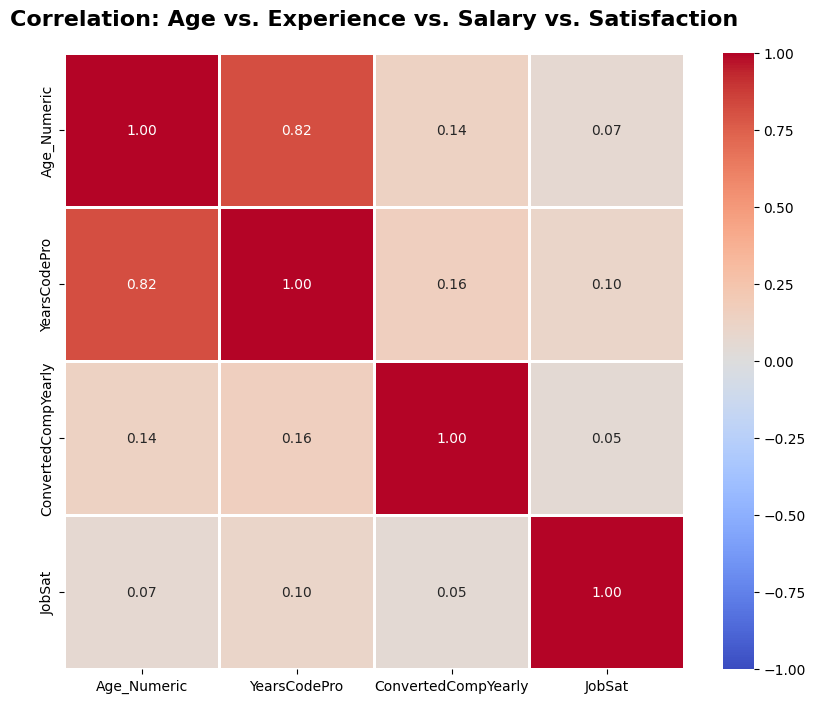

In [74]:
import numpy as np

# Create maps to transform string to numeric Column
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21.0,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67.0,
    'Prefer not to say': np.nan  # We exclude these from correlation
}

years_map = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}

# Transform columns using map
df['Age_Numeric'] = df['Age'].map(age_map)
df['YearsCodePro'] = df['YearsCodePro'].replace(years_map)

# Select columns for correlation analysis
corr_cols = ['Age_Numeric', 'YearsCodePro', 'ConvertedCompYearly', 'JobSat']

# Create a subset
corr_df = df[corr_cols].dropna()

# Compute the correlation matrix
corr_matrix = corr_df.corr()

print("--- Correlation Matrix ---")
print(corr_matrix)

# Visualize with a Heatmap
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=1,
            linecolor='white')

plt.title("Correlation: Age vs. Experience vs. Salary vs. Satisfaction", fontsize=16, fontweight='bold', pad=20)
plt.show()

- Age vs. Experience (0.82): This is a massive positive correlation.

> Insight: This confirms the data is healthy. Obviously, as people get older, they gain more years of professional coding experience. If this number was low, we would have suspected bad data.

- Experience vs. Salary (0.16): This is surprisingly low.

> Insight: "Time served" does not guarantee a higher salary. A correlation of 0.16 implies that having 20 years of experience doesn't automatically make you rich. Why? In tech, Skillset > Tenure. A developer with 5 years of experience in a high-demand language (like AI/ML or Rust) often out-earns a developer with 20 years of experience in a legacy stack.

- Salary vs. Job Satisfaction (0.05): This is the most important number on the chart.

> Insight: The correlation is effectively zero. The Takeaway: There is no statistical evidence in this dataset that paying people more makes them like their job more. A Junior Dev making $50k is just as likely to be "Highly Satisfied" (10/10) as a CTO making $500k.

             Age_Numeric   WorkExp
Age_Numeric     1.000000  0.850363
WorkExp         0.850363  1.000000


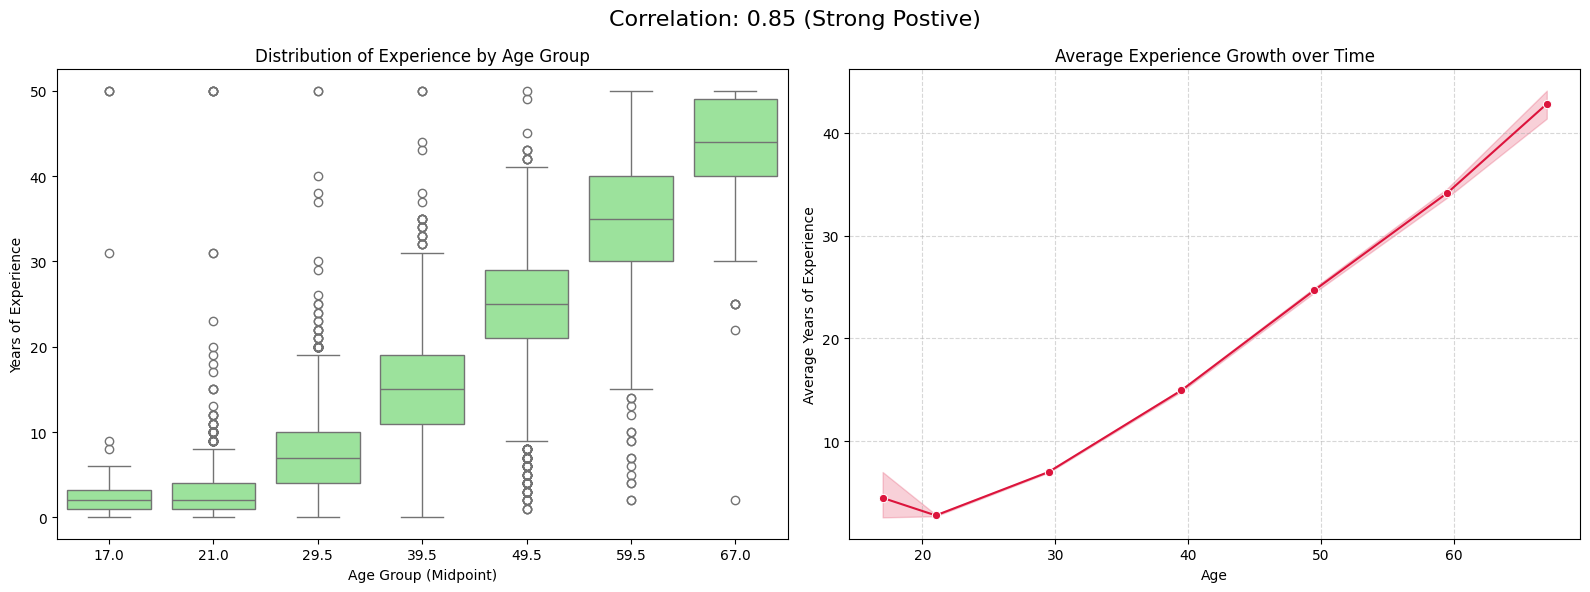

In [88]:
# Create seperate data
awe_corr = df.dropna(subset=['Age_Numeric', 'WorkExp']).copy()
print(awe_corr[['Age_Numeric', 'WorkExp']].corr())


# VISUALIZE
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Box Plot
sns.boxplot(data=awe_corr, x='Age_Numeric', y='WorkExp', ax=axes[0], color='lightgreen')
axes[0].set_title("Distribution of Experience by Age Group")
axes[0].set_ylabel("Years of Experience")
axes[0].set_xlabel("Age Group (Midpoint)")

# Line Plot
sns.lineplot(data=awe_corr, x='Age_Numeric', y='WorkExp', ax=axes[1], color='crimson', marker='o')
axes[1].set_title("Average Experience Growth over Time")
axes[1].set_ylabel("Average Years of Experience")
axes[1].set_xlabel("Age")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle(f"Correlation: {awe_corr['Age_Numeric'].corr(awe_corr['WorkExp']):.2f} (Strong Postive)", fontsize=16)
plt.tight_layout()
plt.show()

Obviously, as people gets older the more experience they have.

---

#### **Summary**

- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the Age column into numeric values for better analysis.